In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

## Q1

Here we will use the Planets dataset (`planets.csv`), it gives information on planets that astronomers have discovered around other stars up tp 2014.

Find number of planet based on discovery method

In [2]:
data = pd.read_csv('planets.csv')
data.head()

,Unnamed: 0,method,number,orbital_period,mass,distance,year
0,0,Radial Velocity,1,269.300,7.10,77.40,2006
1,1,Radial Velocity,1,874.774,2.21,56.95,2008
2,2,Radial Velocity,1,763.000,2.60,19.84,2011
3,3,Radial Velocity,1,326.030,19.40,110.62,2007
4,4,Radial Velocity,1,516.220,10.50,119.47,2009


In [3]:
data.groupby('method')['number'].sum()

method
Astrometry                         2
Eclipse Timing Variations         15
Imaging                           50
Microlensing                      27
Orbital Brightness Modulation      5
Pulsar Timing                     11
Pulsation Timing Variations        1
Radial Velocity                  952
Transit                          776
Transit Timing Variations          9
Name: number, dtype: int64

## Q2

The `GroupBy` object is a very flexible abstraction. In many ways, you can simply treat it as if it's a collection of DataFrames, and it does the difficult things under the hood.

* Find median of orbital period based on discovery method
* Find number of planet discovered by year

In [4]:
data.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [5]:
data.groupby('year')['number'].sum()

year
1989      1
1992      6
1994      3
1995      1
1996     15
1997      1
1998     11
1999     24
2000     27
2001     15
2002     46
2003     35
2004     41
2005     64
2006     43
2007     65
2008    120
2009    131
2010    193
2011    354
2012    258
2013    277
2014    117
Name: number, dtype: int64

## Q3

Plot number of planet discovered by year. Add complexity by adding discovery method.

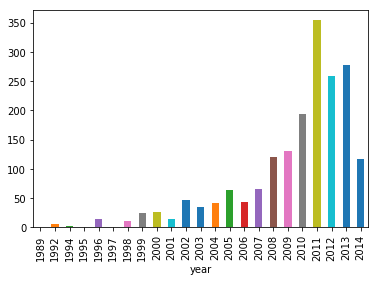

In [8]:
data.groupby('year')['number'].sum().plot(kind='bar')

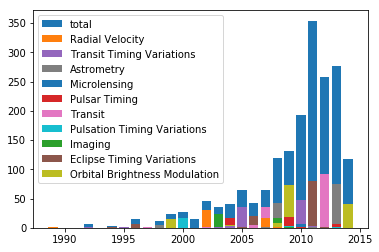

In [12]:
total = data.groupby('year')['number'].sum()
plt.bar(total.index, total, label='total')

for i, method in enumerate(set(data['method'])):
    for year in set(data['year']):
        plt.bar(year,data[(data['method'] == method) & (data['year'] == year)].count()['number'], label=method )

handles, labels = plt.gca().get_legend_handles_labels()
i =1
while i<len(labels):
    if labels[i] in labels[:i]:
        del(labels[i])
        del(handles[i])
    else:
        i +=1

plt.legend(handles, labels)

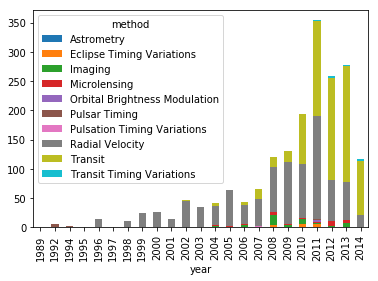

In [17]:
data.groupby(['year', 'method'])['number'].sum().unstack().plot(kind='bar', stacked='True')

## Q4

Count discovered planets by method and by decade.
hint: use `groupby()` and `unstack()`

In [18]:
decade = 10 * (data['year'] // 10)
decade

0       2000
1       2000
2       2010
3       2000
4       2000
5       2000
6       2000
7       1990
8       2000
9       2010
10      2010
11      2000
12      2000
13      1990
14      2000
15      2000
16      1990
17      1990
18      2000
19      2000
20      2010
21      2000
22      2000
23      2000
24      2000
25      1990
26      2010
27      2000
28      2010
29      2000
        ... 
1005    2010
1006    2010
1007    2010
1008    2010
1009    2010
1010    2010
1011    2010
1012    2010
1013    2010
1014    2010
1015    2010
1016    2010
1017    2010
1018    2010
1019    2010
1020    2010
1021    2010
1022    2010
1023    2010
1024    2010
1025    2010
1026    2010
1027    2010
1028    2010
1029    2010
1030    2000
1031    2000
1032    2000
1033    2000
1034    2000
Name: year, Length: 1035, dtype: int64

In [19]:
data.groupby(['method', decade])['number'].sum()

method                         year
Astrometry                     2010      2
Eclipse Timing Variations      2000      5
                               2010     10
Imaging                        2000     29
                               2010     21
Microlensing                   2000     12
                               2010     15
Orbital Brightness Modulation  2010      5
Pulsar Timing                  1990      9
                               2000      1
                               2010      1
Pulsation Timing Variations    2000      1
Radial Velocity                1980      1
                               1990     52
                               2000    475
                               2010    424
Transit                        2000     64
                               2010    712
Transit Timing Variations      2010      9
Name: number, dtype: int64

In [20]:
data.groupby(['method', decade])['number'].sum().unstack()

year,1980,1990,2000,2010
method,,,,
Astrometry,NaN,NaN,NaN,2.0
Eclipse Timing Variations,NaN,NaN,5.0,10.0
Imaging,NaN,NaN,29.0,21.0
Microlensing,NaN,NaN,12.0,15.0
Orbital Brightness Modulation,NaN,NaN,NaN,5.0
Pulsar Timing,NaN,9.0,1.0,1.0
Pulsation Timing Variations,NaN,NaN,1.0,NaN
Radial Velocity,1.0,52.0,475.0,424.0
Transit,NaN,NaN,64.0,712.0


In [21]:
data.groupby(['method', decade])['number'].sum().unstack().fillna(0)

year,1980,1990,2000,2010
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


In [23]:
data.plot?

Signature:     
data.plot(
    ['x=None', 'y=None', "kind='line'", 'ax=None', 'subplots=False', 'sharex=None', 'sharey=False', 'layout=None', 'figsize=None', 'use_index=True', 'title=None', 'grid=None', 'legend=True', 'style=None', 'logx=False', 'logy=False', 'loglog=False', 'xticks=None', 'yticks=None', 'xlim=None', 'ylim=None', 'rot=None', 'fontsize=None', 'colormap=None', 'table=False', 'yerr=None', 'xerr=None', 'secondary_y=False', 'sort_columns=False', '**kwds'],
)
Type:           FramePlotMethods
String form:    <pandas.plotting._core.FramePlotMethods object at 0x11cd994a8>
File:           ~/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py
Docstring:     
DataFrame plotting accessor and method

Examples
--------
>>> df.plot.line()
>>> df.plot.scatter('x', 'y')
>>> df.plot.hexbin()

These plotting methods can also be accessed by calling the accessor as a
method with the ``kind`` argument:
``df.plot(kind='line')`` is equivalent to ``df.plot.line()``
Call docstring:
Ma

In [24]:
data['tahun_t'] = pd.to_datetime(data['year'])

In [25]:
data

,Unnamed: 0,method,number,orbital_period,mass,distance,year,tahun_t
0,0,Radial Velocity,1,269.300000,7.100,77.40,2006,1970-01-01 00:00:00.000002006
1,1,Radial Velocity,1,874.774000,2.210,56.95,2008,1970-01-01 00:00:00.000002008
2,2,Radial Velocity,1,763.000000,2.600,19.84,2011,1970-01-01 00:00:00.000002011
3,3,Radial Velocity,1,326.030000,19.400,110.62,2007,1970-01-01 00:00:00.000002007
4,4,Radial Velocity,1,516.220000,10.500,119.47,2009,1970-01-01 00:00:00.000002009
5,5,Radial Velocity,1,185.840000,4.800,76.39,2008,1970-01-01 00:00:00.000002008
6,6,Radial Velocity,1,1773.400000,4.640,18.15,2002,1970-01-01 00:00:00.000002002
7,7,Radial Velocity,1,798.500000,NaN,21.41,1996,1970-01-01 00:00:00.000001996
8,8,Radial Velocity,1,993.300000,10.300,73.10,2008,1970-01-01 00:00:00.000002008
9,9,Radial Velocity,2,452.800000,1.990,74.79,2010,1970-01-01 00:00:00.000002010
